In [3]:
!pip install -U scikit-fuzzy


    100% |████████████████████████████████| 1.0MB 22.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/81/d9/eb/b8321c08339f51be3e991e7ae45b9673270cb8ca8271482ab1
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [0]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip_new = ctrl.Consequent(np.arange(0, 21, 1), 'tip_new')

In [0]:
quality.automf(5)
service.automf(5)

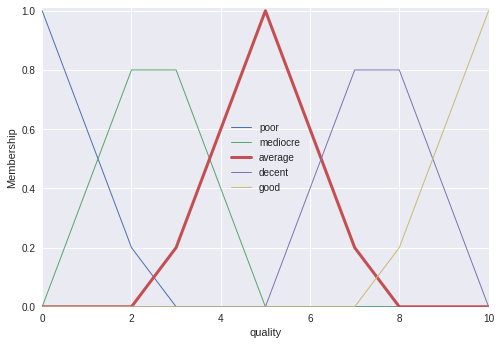

In [18]:
quality['average'].view()

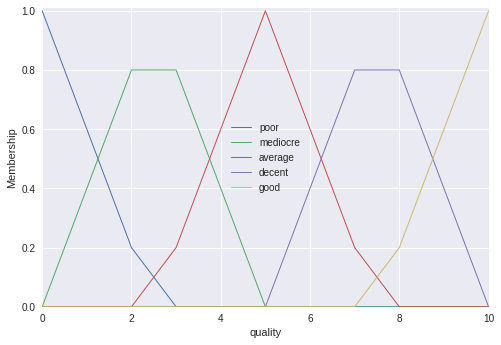

In [11]:
quality.view()

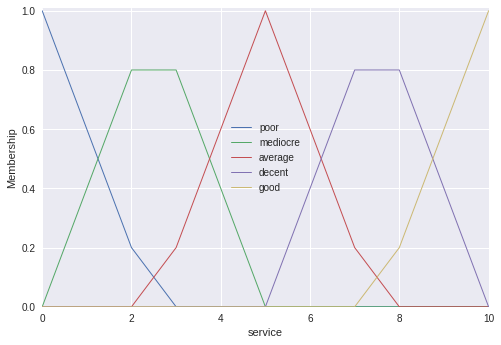

In [19]:
service.view()

In [0]:
tip_new['very low'] = fuzz.trapmf(tip_new.universe, [0, 0, 1,5])
tip_new['low'] = fuzz.trapmf(tip_new.universe, [0, 4,6,10])
tip_new['average'] = fuzz.trapmf(tip_new.universe, [5,9,11,15])
tip_new['high'] = fuzz.trapmf(tip_new.universe, [10,14,16,20])
tip_new['very high'] = fuzz.trapmf(tip_new.universe, [15,19,20,20])



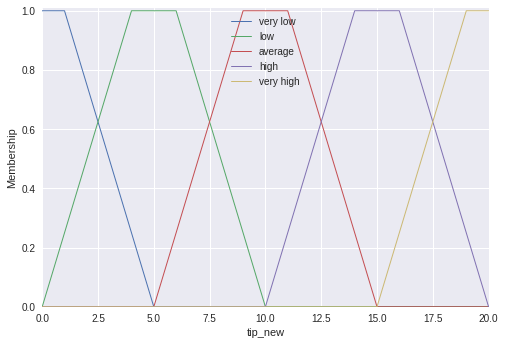

In [21]:
tip_new.view()

In [0]:
#rule_base
rule1 = ctrl.Rule((quality['poor'] & service['poor']) |(quality['poor'] & service['mediocre']) |(quality['mediocre'] & service['poor']),tip_new['very low'])
rule2 = ctrl.Rule((quality['mediocre'] & service['mediocre']) |(quality['average'] & service['mediocre']) |(quality['mediocre'] & service['average']),tip_new['low'])
rule3 = ctrl.Rule((quality['average'] & service['average']) |(quality['decent'] & service['average']) |(quality['average'] & service['decent']),tip_new['average'])
rule4 = ctrl.Rule((quality['decent'] & service['decent']) |(quality['good'] & service['decent']) |(quality['decent'] & service['good']),tip_new['high'])
rule5 = ctrl.Rule((quality['good'] & service['good']),tip_new['very high'])
                                    
                                                      


(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9a93f7ac18>)

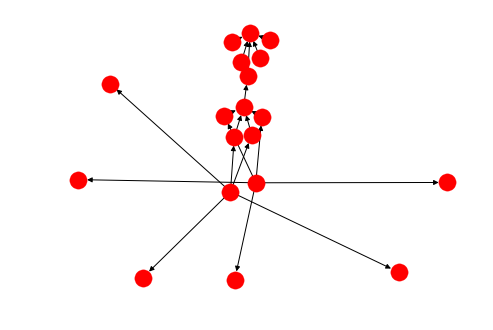

In [23]:
rule1.view()

In [0]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

In [0]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)



In [0]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()

14.386422842476748


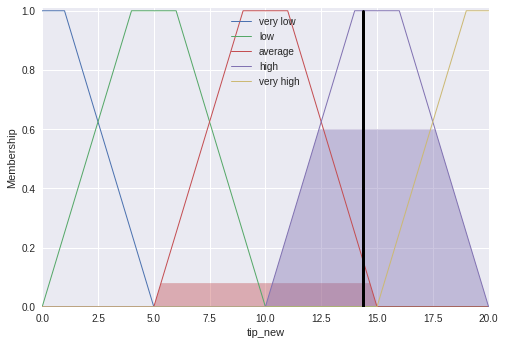

In [27]:
print(tipping.output['tip_new'])
tip_new.view(sim=tipping)

In [0]:
tipping.input['quality'] = 8.5
tipping.input['service'] = 9.8
tipping.compute()

15.312287847929394


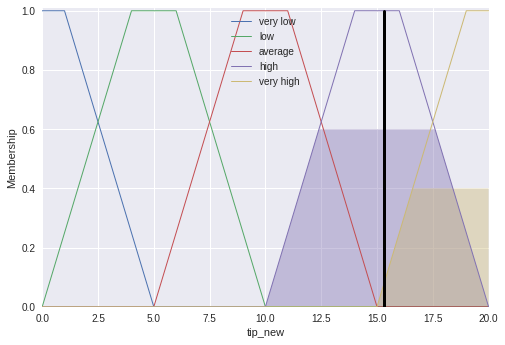

In [29]:
print(tipping.output['tip_new'])
tip_new.view(sim=tipping)

In [0]:
tipping.input['quality'] = 1
tipping.input['service'] = 3
tipping.compute()

4.171693735498841


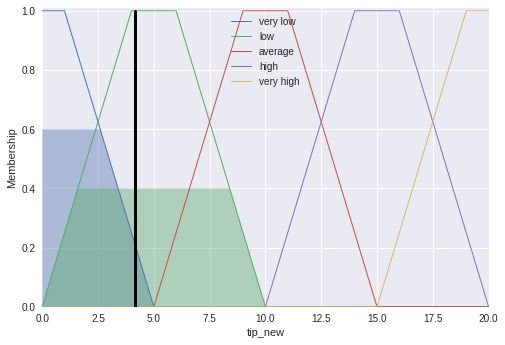

In [31]:
print(tipping.output['tip_new'])
tip_new.view(sim=tipping)

In [0]:
tipping.input['quality'] = 10
tipping.input['service'] = 10
tipping.compute()

18.27777777777778


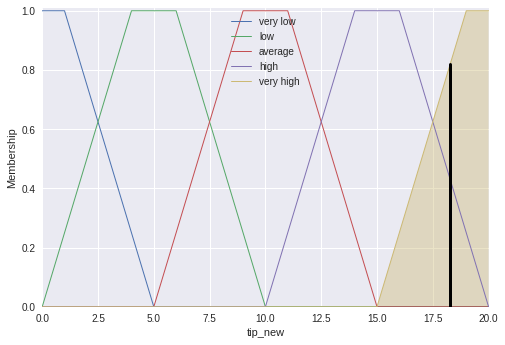

In [33]:
print(tipping.output['tip_new'])
tip_new.view(sim=tipping)